## IMDB 긍부정 실습

In [1]:
import tensorflow as tf
from tensorflow import keras

print(tf.__version__)
print(keras.__version__)

2.0.0
2.2.4-tf


### Dataset 불러오기

In [2]:
from tensorflow.keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [41]:
train_data.shape

(25000,)

In [40]:
train_labels[1]

0

In [3]:
print(train_data.shape)
print(test_data.shape)

(25000,)
(25000,)


In [4]:
train_labels[1]

0

### 데이터 탐색

In [5]:
word_index = imdb.get_word_index()

In [6]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

In [7]:
decode_review = ' '.join([reverse_word_index.get(i - 3, 
                                                 '?') for i in train_data[0]])
decode_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

## 입력 데이터 준비

In [8]:
import numpy as np

In [ ]:
def vectorize_sequences(sequences, dimension=100):
    # 크기가 (len(sequences), dimension)이고 원소가 0인 행렬을 만들어준다
    results = np.zeros((len(sequences), dimension))
    
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1. # result[i]에서 특정 인덱스 위치를 1로 만들어준다.
    return results

In [10]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [11]:
print(x_train.shape)
print(x_test.shape)

(25000, 10000)
(25000, 10000)


In [36]:
x_train

array([[0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.]])

In [12]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [13]:
print(y_train.shape)
print(y_test.shape)

(25000,)
(25000,)


## 신경망 모델 만들기

In [1]:
from tensorflow.keras import models
from tensorflow.keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [15]:
model = models.Sequential([
    layers.Dense(16, activation='relu', input_shape=(10000,)),
    layers.Dense(16, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

In [16]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(tf.keras.layers.Dense(16, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

In [17]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(16, activation='relu', input_shape=(10000,)),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [18]:
model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['accuracy'])

In [19]:
model.compile(tf.keras.optimizers.RMSprop(lr=0.001),
             loss='binary_crossentropy',
             metrics=['accuracy'])

In [20]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [21]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=50,
                    validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 3s 203us/sample - loss: 0.3669 - accuracy: 0.8517 - val_loss: 0.2734 - val_accuracy: 0.8891
Epoch 2/20
15000/15000 [==============================] - 2s 143us/sample - loss: 0.2025 - accuracy: 0.9221 - val_loss: 0.2929 - val_accuracy: 0.8863
Epoch 3/20
15000/15000 [==============================] - 2s 142us/sample - loss: 0.1541 - accuracy: 0.9435 - val_loss: 0.3106 - val_accuracy: 0.8845
Epoch 4/20
15000/15000 [==============================] - 2s 145us/sample - loss: 0.1226 - accuracy: 0.9563 - val_loss: 0.3479 - val_accuracy: 0.8795
Epoch 5/20
15000/15000 [==============================] - 2s 149us/sample - loss: 0.0989 - accuracy: 0.9637 - val_loss: 0.3900 - val_accuracy: 0.8760
Epoch 6/20
15000/15000 [==============================] - 2s 146us/sample - loss: 0.0779 - accuracy: 0.9730 - val_loss: 0.4965 - val_accuracy: 0.8667
Epoch 7/20
15000/15000 [==========================

In [22]:
import matplotlib.pyplot as plt

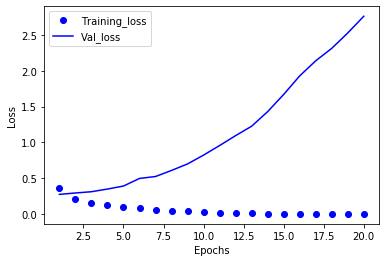

In [23]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss, 'bo', label='Training_loss')
plt.plot(epochs, val_loss, 'b', label='Val_loss')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

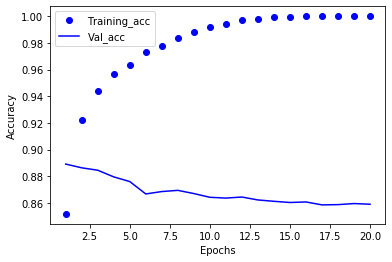

In [24]:
plt.plot(epochs, acc, 'bo', label='Training_acc')
plt.plot(epochs, val_acc, 'b', label='Val_acc')

plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## 적은 층, 많은 층 모델 빌드

In [25]:
from tensorflow.keras import models
from tensorflow.keras import layers

model_small = models.Sequential([
    layers.Dense(4, activation='relu', input_shape=(10000,)),
    layers.Dense(4, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model_small.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['accuracy'])

history_small = model_small.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=50,
                    validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 3s 188us/sample - loss: 0.4683 - accuracy: 0.8230 - val_loss: 0.3175 - val_accuracy: 0.8804
Epoch 2/20
15000/15000 [==============================] - 2s 145us/sample - loss: 0.2478 - accuracy: 0.9074 - val_loss: 0.2703 - val_accuracy: 0.8922
Epoch 3/20
15000/15000 [==============================] - 2s 147us/sample - loss: 0.1863 - accuracy: 0.9320 - val_loss: 0.2733 - val_accuracy: 0.8908
Epoch 4/20
15000/15000 [==============================] - 2s 149us/sample - loss: 0.1530 - accuracy: 0.9443 - val_loss: 0.2923 - val_accuracy: 0.8859
Epoch 5/20
15000/15000 [==============================] - 2s 147us/sample - loss: 0.1302 - accuracy: 0.9536 - val_loss: 0.3092 - val_accuracy: 0.8849
Epoch 6/20
15000/15000 [==============================] - 2s 147us/sample - loss: 0.1135 - accuracy: 0.9611 - val_loss: 0.3530 - val_accuracy: 0.8770
Epoch 7/20
15000/15000 [==========================

In [26]:
from tensorflow.keras import models
from tensorflow.keras import layers

model_big = models.Sequential([
    layers.Dense(128, activation='relu', input_shape=(10000,)),
    layers.Dense(128, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model_big.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['accuracy'])

history_big = model_small.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=50,
                    validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 2s 143us/sample - loss: 0.0157 - accuracy: 0.9951 - val_loss: 0.9048 - val_accuracy: 0.8578
Epoch 2/20
15000/15000 [==============================] - 2s 141us/sample - loss: 0.0128 - accuracy: 0.9964 - val_loss: 0.9638 - val_accuracy: 0.8567
Epoch 3/20
15000/15000 [==============================] - 2s 142us/sample - loss: 0.0107 - accuracy: 0.9973 - val_loss: 1.0320 - val_accuracy: 0.8563
Epoch 4/20
15000/15000 [==============================] - 2s 142us/sample - loss: 0.0085 - accuracy: 0.9977 - val_loss: 1.1014 - val_accuracy: 0.8548
Epoch 5/20
15000/15000 [==============================] - 2s 142us/sample - loss: 0.0069 - accuracy: 0.9984 - val_loss: 1.1698 - val_accuracy: 0.8535
Epoch 6/20
15000/15000 [==============================] - 2s 142us/sample - loss: 0.0059 - accuracy: 0.9986 - val_loss: 1.2456 - val_accuracy: 0.8537
Epoch 7/20
15000/15000 [==========================

In [27]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

acc_small = history_small.history['accuracy']
val_acc_small = history_small.history['val_accuracy']
loss_small = history_small.history['loss']
val_loss_small = history_small.history['val_loss']

acc_big = history_big.history['accuracy']
val_acc_big = history_big.history['val_accuracy']
loss_big = history_big.history['loss']
val_loss_big = history_big.history['val_loss']

epochs = range(1, len(acc) + 1)

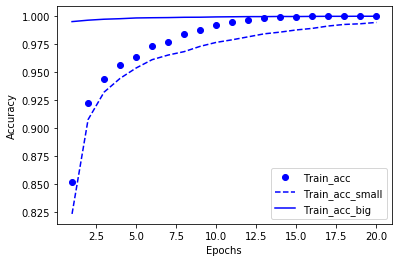

In [28]:
import matplotlib.pyplot as plt

plt.plot(epochs, acc, 'bo', label='Train_acc')
plt.plot(epochs, acc_small, 'b--', label='Train_acc_small')
plt.plot(epochs, acc_big, 'b', label='Train_acc_big')

plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

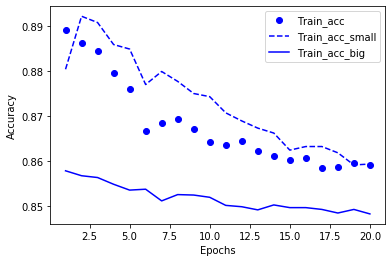

In [29]:
import matplotlib.pyplot as plt

plt.plot(epochs, val_acc, 'bo', label='Train_acc')
plt.plot(epochs, val_acc_small, 'b--', label='Train_acc_small')
plt.plot(epochs, val_acc_big, 'b', label='Train_acc_big')

plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

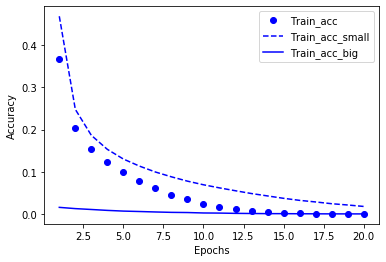

In [30]:
import matplotlib.pyplot as plt

plt.plot(epochs, loss, 'bo', label='Train_acc')
plt.plot(epochs, loss_small, 'b--', label='Train_acc_small')
plt.plot(epochs, loss_big, 'b', label='Train_acc_big')

plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## L1, L2 Norm 정규화

In [31]:
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import regularizers

model_l2 = models.Sequential([
    layers.Dense(16, kernel_regularizer=regularizers.l2(0.001), activation='relu', input_shape=(10000,)),
    layers.Dense(16, kernel_regularizer=regularizers.l2(0.001), activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model_l2.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['accuracy'])

history_l2 = model_l2.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=50,
                    validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 3s 184us/sample - loss: 0.4061 - accuracy: 0.8477 - val_loss: 0.3196 - val_accuracy: 0.8827
Epoch 2/20
15000/15000 [==============================] - 2s 146us/sample - loss: 0.2682 - accuracy: 0.9088 - val_loss: 0.3182 - val_accuracy: 0.8838
Epoch 3/20
15000/15000 [==============================] - 2s 148us/sample - loss: 0.2474 - accuracy: 0.9191 - val_loss: 0.3297 - val_accuracy: 0.8823
Epoch 4/20
15000/15000 [==============================] - 2s 153us/sample - loss: 0.2382 - accuracy: 0.9224 - val_loss: 0.3411 - val_accuracy: 0.8778
Epoch 5/20
15000/15000 [==============================] - 2s 162us/sample - loss: 0.2295 - accuracy: 0.9269 - val_loss: 0.3799 - val_accuracy: 0.8710
Epoch 6/20
15000/15000 [==============================] - 2s 152us/sample - loss: 0.2214 - accuracy: 0.9290 - val_loss: 0.3533 - val_accuracy: 0.8760
Epoch 7/20
15000/15000 [==========================

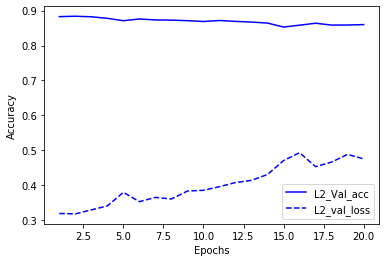

In [32]:
import matplotlib.pyplot as plt

model_l2_val_loss = history_l2.history['val_loss']
model_l2_val_acc = history_l2.history['val_accuracy']

plt.plot(epochs, model_l2_val_acc, 'b', label='L2_Val_acc')
plt.plot(epochs, model_l2_val_loss, 'b--', label='L2_val_loss')

plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## Dropout 추가

In [33]:
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import regularizers

model_drop = models.Sequential([
    layers.Dense(16, activation='relu', input_shape=(10000,)),
    layers.Dropout(0.5),
    layers.Dense(16, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')
])

model_drop.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['accuracy'])

history_drop = model_drop.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=50,
                    validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 3s 228us/sample - loss: 0.5405 - accuracy: 0.7240 - val_loss: 0.3306 - val_accuracy: 0.8760
Epoch 2/20
15000/15000 [==============================] - 2s 155us/sample - loss: 0.3632 - accuracy: 0.8616 - val_loss: 0.2937 - val_accuracy: 0.8853
Epoch 3/20
15000/15000 [==============================] - 2s 148us/sample - loss: 0.3083 - accuracy: 0.8901 - val_loss: 0.3096 - val_accuracy: 0.8797
Epoch 4/20
15000/15000 [==============================] - 2s 147us/sample - loss: 0.2874 - accuracy: 0.8977 - val_loss: 0.3147 - val_accuracy: 0.8808
Epoch 5/20
15000/15000 [==============================] - 2s 147us/sample - loss: 0.2694 - accuracy: 0.9068 - val_loss: 0.3275 - val_accuracy: 0.8787
Epoch 6/20
15000/15000 [==============================] - 2s 143us/sample - loss: 0.2520 - accuracy: 0.9162 - val_loss: 0.3485 - val_accuracy: 0.8772
Epoch 7/20
15000/15000 [==========================

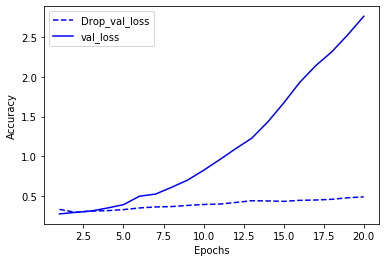

In [34]:
import matplotlib.pyplot as plt

model_drop_val_loss = history_drop.history['val_loss']

plt.plot(epochs, model_drop_val_loss, 'b--', label='Drop_val_loss')
plt.plot(epochs, val_loss, 'b', label='val_loss')

plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()